In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os
import sys
from copy import copy, deepcopy

In [2]:
sys.path.append("/root/project/soter_v2")
sys.path.append("/root/project/soter_v2/metric_space_analysis")
sys.path.append("/root/project/soter_v2/basic")

In [3]:
from metric_space_analysis.search import *
from basic.loop_topo import *
from basic.arch import *

In [4]:
# import data
# data = pickle.load(open("report/arch_Simba/obj_edp/bertlarge_input1/layer-4/record.pkl", "rb"))
# data = pickle.load(open("report/arch_Simba/obj_edp/bertlarge_input1/layer-4/long_search/record.pkl", "rb"))
# data = pickle.load(open("report/arch_Simba/obj_edp/bertlarge_input1/layer-4/long_search_random_search/record.pkl", "rb"))
data = pickle.load(open("report/arch_TensorCore/obj_edp/bertlarge_input1/layer-0/ep100/record.pkl", "rb"))

In [5]:
# arch = Arch(yaml.load(open("/root/project/Soter/SpatialAccelerators/Simba/arch.yaml", "r"), Loader=yaml.FullLoader))
arch = Arch(yaml.load(open("/root/project/Soter/SpatialAccelerators/TensorCore/arch.yaml", "r"), Loader=yaml.FullLoader))

In [6]:
#insert loop topology column
map_records = data["map_record"]
new_map_records = deepcopy(map_records)
new_map_records["topo"] = []
for map_data in new_map_records["map"]:
  topo = LoopTopo(arch, map_data)
  new_map_records["topo"].append(topo)

In [21]:
data

{'arch': {'architecture': {'version': 0.3,
   'subtree': [{'name': 'system',
     'attributes': {'technology': '45nm'},
     'local': [{'name': 'DRAM',
       'class': 'DRAM',
       'attributes': {'type': 'LPDDR4',
        'word-bits': 8,
        'cluster-size': 1,
        'read_bandwidth': 16,
        'write_bandwidth': 16}}],
     'subtree': [{'name': 'SM',
       'attributes': {'technology': '45nm'},
       'local': [{'name': 'SMEM',
         'class': 'SRAM',
         'attributes': {'depth': 8192,
          'width': 256,
          'n_banks': 2,
          'block-size': 32,
          'word-bits': 8,
          'cluster-size': 1,
          'read_bandwidth': 64,
          'write_bandwidth': 64}}],
       'subtree': [{'name': 'Subpartition[0..3]',
         'attributes': {'technology': '45nm'},
         'local': [{'name': 'RF',
           'class': 'SRAM',
           'attributes': {'depth': 2048,
            'width': 8,
            'n_banks': 16,
            'block-size': 1,
            'w

In [7]:
#	epoch	map	batch_idx	cycle	energy	edp	topo
df = pd.DataFrame(new_map_records)

In [8]:
#cycle	energy	edp
#min	max	mean	min	max	mean	min	max	mean
#epoch	
stat_epoch_df = df.groupby('epoch').agg({
    'cycle': ['min', 'max', 'mean'],
    'energy': ['min', 'max', 'mean'],
    'edp': ['min', 'max', 'mean']
})

In [9]:
# group by topo
## num of search
## min, mean, max, std
df_by_topo = df.groupby('topo').agg(
  count=('topo', 'count'),
  cycle=('cycle', 'mean'),
  energy=('energy', 'mean'),
  edp=('edp', 'mean')
)

In [10]:
df_by_topo

,count,cycle,energy,edp
topo,,,,
"{'DRAM': {'temporal': ['C', 'K', 'N'], 'spatial': [], 'temporal_postfix': [0, 0, 0], 'spatial_postfix': [], 'temporal_value': [2, 12, 16], 'spatial_value': []}, 'SMEM': {'temporal': [], 'spatial': ['N'], 'temporal_postfix': [], 'spatial_postfix': [1], 'temporal_value': [], 'spatial_value': [4]}, 'RF': {'temporal': ['N', 'C', 'K'], 'spatial': ['N', 'K'], 'temporal_postfix': [2, 1, 1], 'spatial_postfix': [3, 2], 'temporal_value': [2, 512, 4], 'spatial_value': [4, 64]}, 'LRF': {'temporal': [], 'spatial': [], 'temporal_postfix': [], 'spatial_postfix': [], 'temporal_value': [], 'spatial_value': []}}",32,-1.416704e+07,-18603.150625,4.186120e+11
"{'DRAM': {'temporal': ['C', 'K', 'N'], 'spatial': [], 'temporal_postfix': [0, 0, 0], 'spatial_postfix': [], 'temporal_value': [2, 12, 32], 'spatial_value': []}, 'SMEM': {'temporal': [], 'spatial': ['N'], 'temporal_postfix': [], 'spatial_postfix': [1], 'temporal_value': [], 'spatial_value': [4]}, 'RF': {'temporal': ['K', 'C', 'N'], 'spatial': ['K', 'C', 'N'], 'temporal_postfix': [1, 1, 2], 'spatial_postfix': [2, 2, 3], 'temporal_value': [8, 128, 2], 'spatial_value': [32, 4, 2]}, 'LRF': {'temporal': [], 'spatial': [], 'temporal_postfix': [], 'spatial_postfix': [], 'temporal_value': [], 'spatial_value': []}}",32,-1.789107e+07,-17474.187813,3.581467e+11
"{'DRAM': {'temporal': ['C', 'K', 'N'], 'spatial': [], 'temporal_postfix': [0, 0, 0], 'spatial_postfix': [], 'temporal_value': [2, 16, 16], 'spatial_value': []}, 'SMEM': {'temporal': ['K'], 'spatial': ['N', 'C'], 'temporal_postfix': [1], 'spatial_postfix': [1, 1], 'temporal_value': [4], 'spatial_value': [2, 2]}, 'RF': {'temporal': ['N', 'C', 'K'], 'spatial': ['C', 'K'], 'temporal_postfix': [2, 2, 2], 'spatial_postfix': [3, 3], 'temporal_value': [16, 8, 6], 'spatial_value': [32, 8]}, 'LRF': {'temporal': [], 'spatial': [], 'temporal_postfix': [], 'spatial_postfix': [], 'temporal_value': [], 'spatial_value': []}}",32,-1.489357e+07,-14894.175625,2.943833e+11
"{'DRAM': {'temporal': ['C', 'K', 'N'], 'spatial': [], 'temporal_postfix': [0, 0, 0], 'spatial_postfix': [], 'temporal_value': [2, 16, 8], 'spatial_value': []}, 'SMEM': {'temporal': ['C', 'K'], 'spatial': ['C', 'N'], 'temporal_postfix': [1, 1], 'spatial_postfix': [2, 1], 'temporal_value': [2, 12], 'spatial_value': [2, 2]}, 'RF': {'temporal': ['N', 'K'], 'spatial': ['N', 'C'], 'temporal_postfix': [2, 2], 'spatial_postfix': [3, 3], 'temporal_value': [16, 16], 'spatial_value': [2, 128]}, 'LRF': {'temporal': [], 'spatial': [], 'temporal_postfix': [], 'spatial_postfix': [], 'temporal_value': [], 'spatial_value': []}}",32,-1.919360e+07,-18301.324375,4.027933e+11
"{'DRAM': {'temporal': ['C', 'K', 'N'], 'spatial': [], 'temporal_postfix': [0, 0, 0], 'spatial_postfix': [], 'temporal_value': [2, 32, 4], 'spatial_value': []}, 'SMEM': {'temporal': ['C', 'K'], 'spatial': ['C', 'K'], 'temporal_postfix': [1, 1], 'spatial_postfix': [2, 2], 'temporal_value': [2, 3], 'spatial_value': [2, 2]}, 'RF': {'temporal': ['N', 'K'], 'spatial': ['N', 'C'], 'temporal_postfix': [1, 3], 'spatial_postfix': [2, 3], 'temporal_value': [64, 16], 'spatial_value': [2, 128]}, 'LRF': {'temporal': [], 'spatial': [], 'temporal_postfix': [], 'spatial_postfix': [], 'temporal_value': [], 'spatial_value': []}}",32,-1.545011e+07,-27541.866875,1.347600e+12
...,...,...,...,...
"{'DRAM': {'temporal': ['N', 'K'], 'spatial': [], 'temporal_postfix': [0, 0], 'spatial_postfix': [], 'temporal_value': [64, 24], 'spatial_value': []}, 'SMEM': {'temporal': ['C'], 'spatial': ['N'], 'temporal_postfix': [0], 'spatial_postfix': [1], 'temporal_value': [2], 'spatial_value': [4]}, 'RF': {'temporal': ['N', 'K', 'C'], 'spatial': ['K', 'C'], 'temporal_postfix': [2, 1, 1], 'spatial_postfix': [2, 2], 'temporal_value': [2, 64, 4], 'spatial_value': [2, 128]}, 'LRF': {'temporal': [], 'spatial': [], 'temporal_postfix': [], 'spatial_postfix': [], 'temporal_value': [], 'spatial_value': []}}",32,-1.464832e+07,-18891.447188,3.371273e+11
"{'DRA

In [11]:
df_by_topo.to_excel("temp.xlsx")

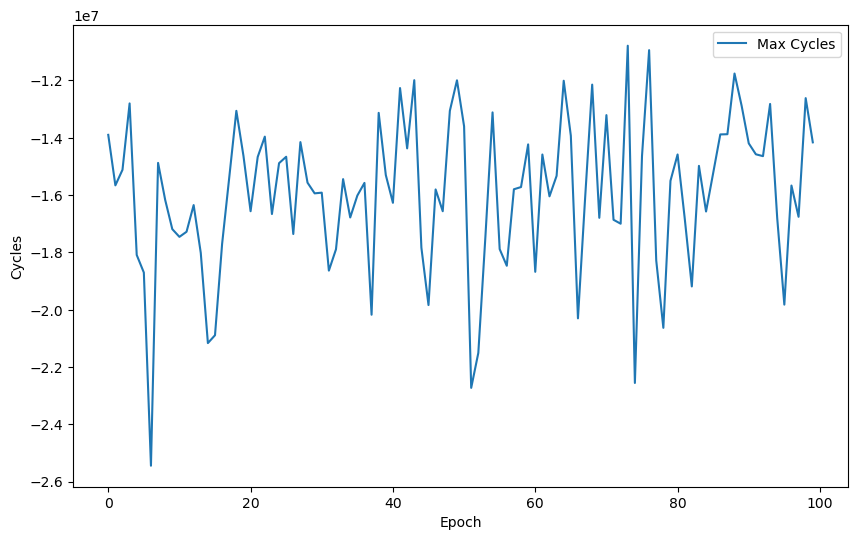

In [12]:
plt.figure(figsize=(10, 6))
# plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'min')], label='Min Cycles')
plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'mean')], label='Max Cycles')
plt.xlabel('Epoch')
plt.ylabel('Cycles')
plt.legend()
plt.show()

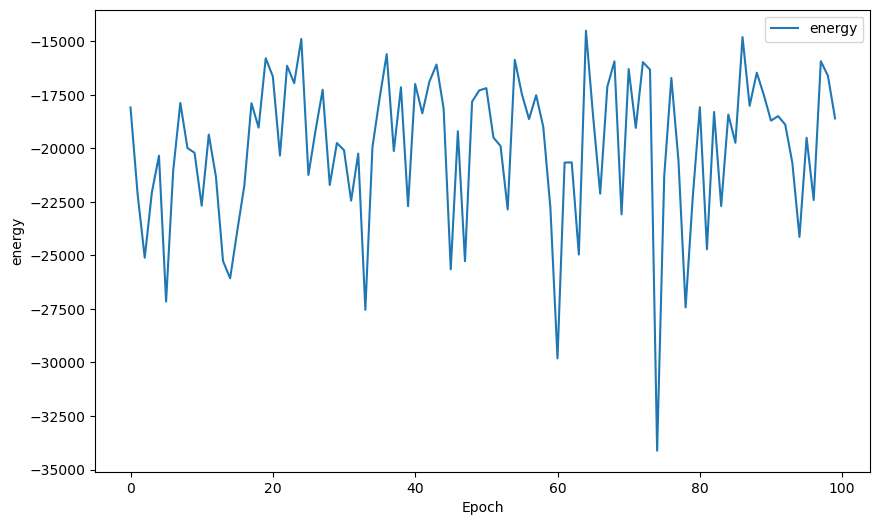

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot(stat_epoch_df.index, stat_epoch_df[('cycle', 'min')], label='Min Cycles')
plt.plot(stat_epoch_df.index, stat_epoch_df[('energy', 'mean')], label='energy')
plt.xlabel('Epoch')
plt.ylabel('energy')
plt.legend()
plt.show()

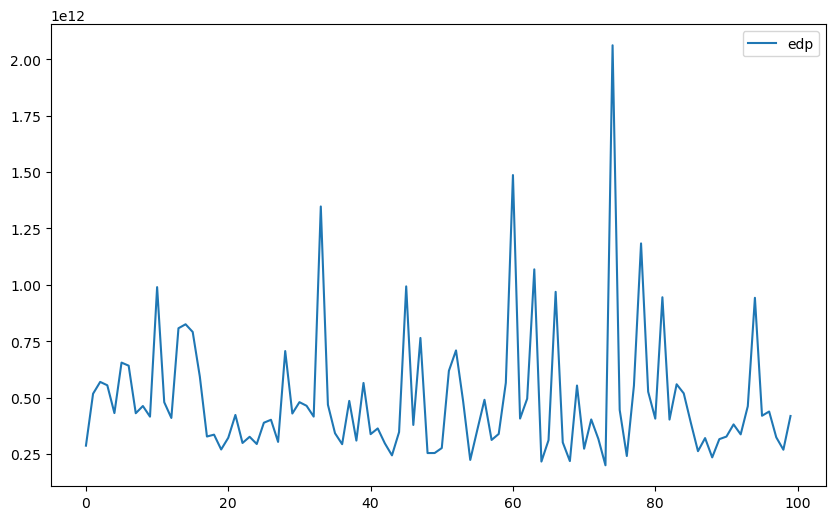

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(stat_epoch_df.index, stat_epoch_df[('edp', 'mean')], label='edp')
plt.legend()
plt.show()

In [15]:
min_cycle_map = df.loc[df['cycle'].idxmax()]
min_enery_map = df.loc[df['energy'].idxmax()]
min_edp_map = df.loc[df['edp'].idxmin()]

In [16]:
yaml.dump(min_cycle_map["map"], open("min_cycle_map.yaml", "w"))
yaml.dump(min_enery_map["map"], open("min_energy_map.yaml", "w"))
yaml.dump(min_edp_map["map"], open("min_edp_map.yaml", "w"))

In [17]:
min_cycle_map
#14680064.0
#37748736.0

epoch                                                        0
map          {'mapping': [{'target': 'LRF', 'type': 'tempor...
batch_idx                                                   30
cycle                                               -1572864.0
energy                                                -3216.63
edp                                              5059321528.32
topo         {'DRAM': {'temporal': ['K', 'N'], 'spatial': [...
Name: 30, dtype: object

In [18]:
min_enery_map
#4101.98
#6410.41

epoch                                                       22
map          {'mapping': [{'target': 'LRF', 'type': 'tempor...
batch_idx                                                   26
cycle                                               -1572864.0
energy                                                -3104.12
edp                                              4882358599.68
topo         {'DRAM': {'temporal': ['K', 'N'], 'spatial': [...
Name: 730, dtype: object

In [19]:
min_edp_map
#71609016647.679993
#241984874741.76

epoch                                                       22
map          {'mapping': [{'target': 'LRF', 'type': 'tempor...
batch_idx                                                   26
cycle                                               -1572864.0
energy                                                -3104.12
edp                                              4882358599.68
topo         {'DRAM': {'temporal': ['K', 'N'], 'spatial': [...
Name: 730, dtype: object